## Условие 1: Задача 1  

Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  

### 1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv


In [1]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


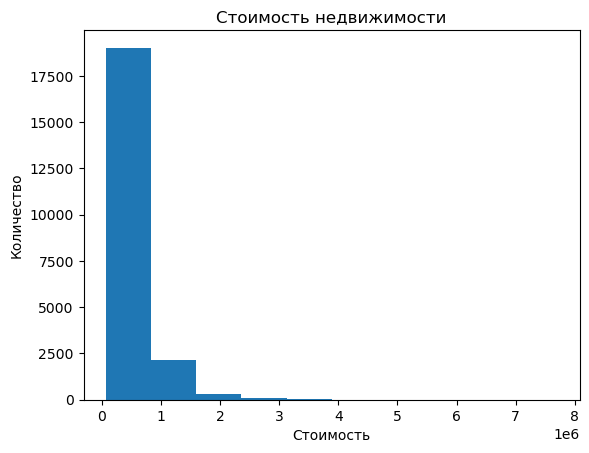

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Вывод: Основная часть недвижимости находится в диапазоне стоимости до 1 000 000.

### 1.3 Изучите распределение квадратуры жилой


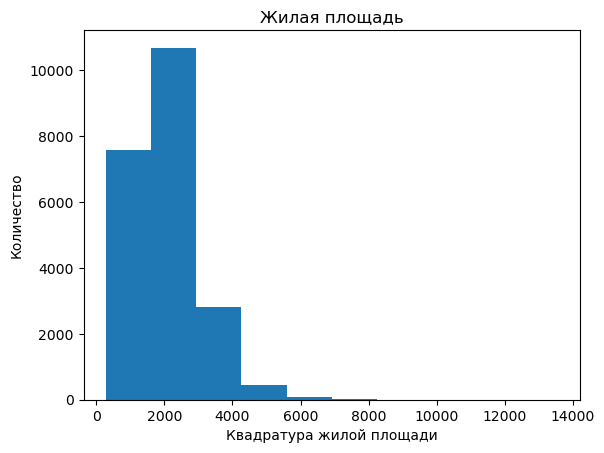

In [3]:
plt.hist(df['sqft_living'])
plt.title('Жилая площадь')
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество');

Вывод: Основная часть недвижимости имееть жилую площадь в диапазоне 2000-25000.

### 1.4 Изучите распределение года постройки

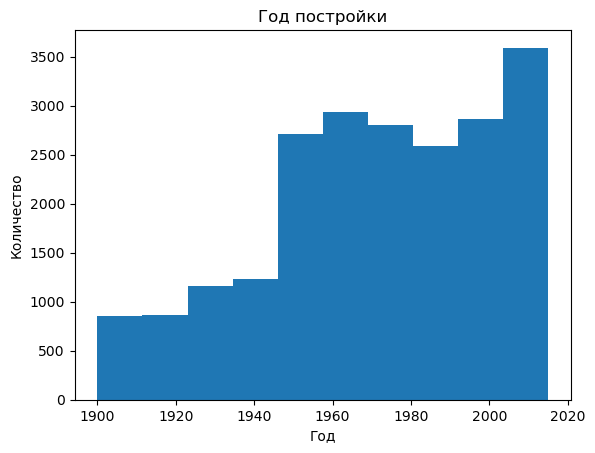

In [4]:
plt.hist(df['yr_built'])
plt.title('Год постройки')
plt.xlabel('Год')
plt.ylabel('Количество');

Вывод: Основная часть недвижимости была построена в послевоенные годы. Если выбирать пятилетний срок,  
то наибольшее количество недвижимости находится в диапазоне 2010-2015 года постройки.

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график  
Сделайте выводы  


In [5]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

In [6]:
names = data.index
values = data.values
print(names)
print(values)


Int64Index([0, 1], dtype='int64')
[21450   163]


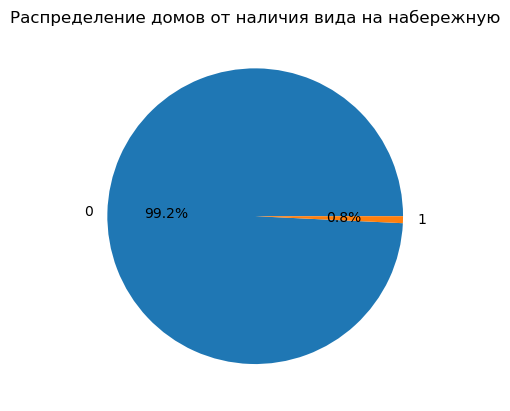

In [7]:
plt.title('Распределение домов от наличия вида на набережную')
plt.pie(values, autopct = '%.1f%%', labels = names);


Вывод: Менее 1% недвижимости имеет вид на набережную

### 2.2 Изучите распределение состояния домов

In [8]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [9]:
names = data.index
values = data.values
print(names)
print(values)

Int64Index([3, 4, 5, 2, 1], dtype='int64')
[14031  5679  1701   172    30]


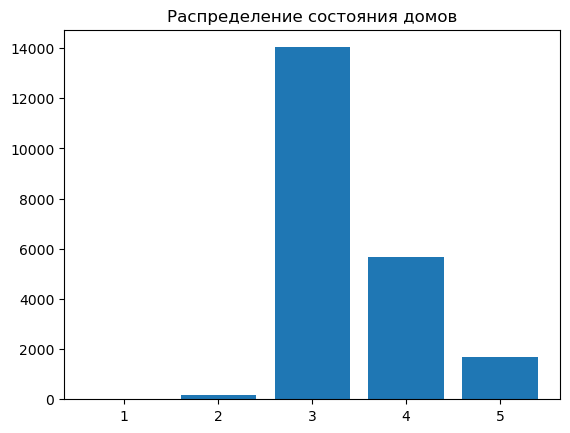

In [10]:
plt.title('Распределение состояния домов')
plt.bar(names, values);


Вывод: Наибольшее количество недвижимости имеет среднее состояние -"3", далее "4" и "5". Состояние "1" и "2"  
имеют незначительное количество недвижимости. 
    

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Построим матрицу корреляций:

In [11]:
import seaborn as sns
import numpy as np

In [12]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix < 0.3)] = 0
corr_matrix

C:\Users\Taratynov family\AppData\Local\Temp\ipykernel_7952\1300724616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


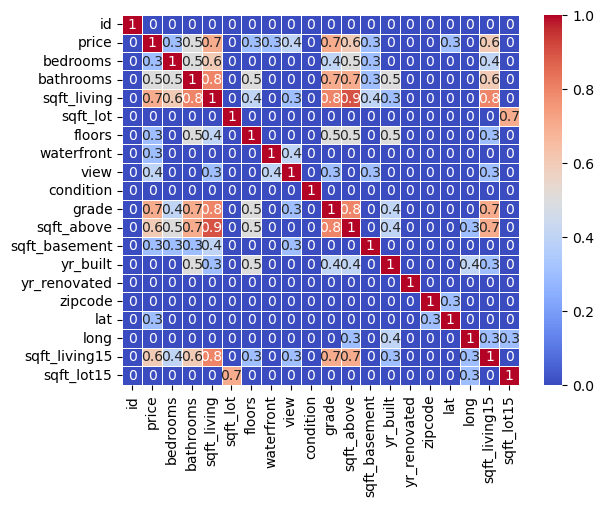

In [13]:
sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, cmap='coolwarm');

Наибольшую зависимость недвижимость имеет от жилой площади, качество конструкции, sqft_above, жилая площадь ближайщих 15 домов и количества ванных комнат.  
Посмотрим данные на графиках:

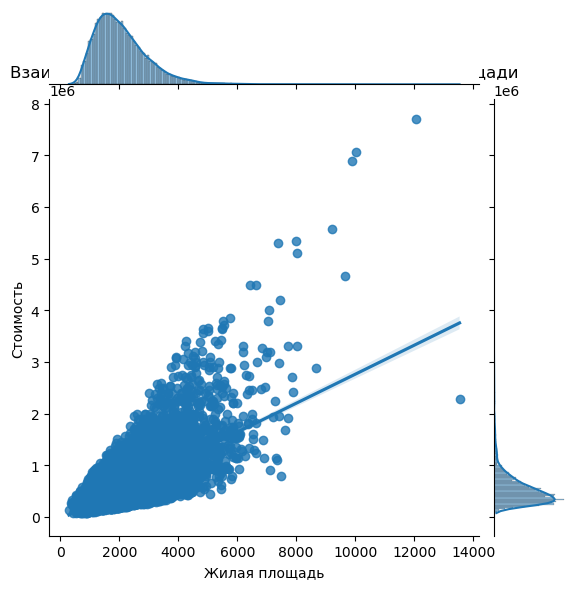

In [14]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');
plt.title('Взаимосвязь стоимость недвижимости и жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость');

На данном графие можно увидеть влияние жилой площади на цену. Из графика можно сделать вывод: стоимость домов имеют прямую линейную зависимость от значения жилой площади.

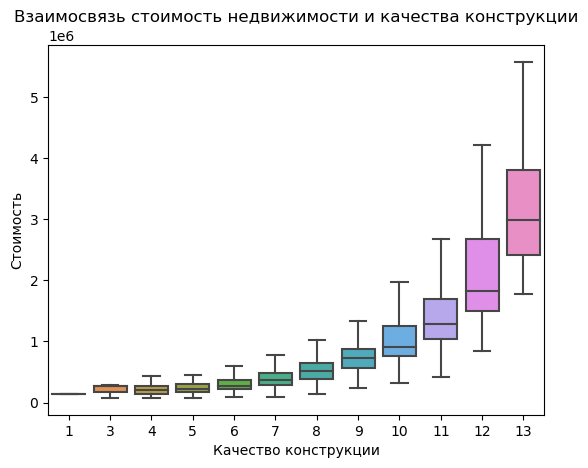

In [20]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.title('Взаимосвязь стоимость недвижимости и качества конструкции')
plt.xlabel('Качество конструкции')
plt.ylabel('Стоимость');

На данном графике можно увидеть соотношение качества конструкции и дизайна здания с его ценой. При этом видно что здания с плохой конструкцией незначительноотличаются в цене, но с увеличением этого показателя цена здания существенно повышается, в том числе растет и её ценовой диапазон.

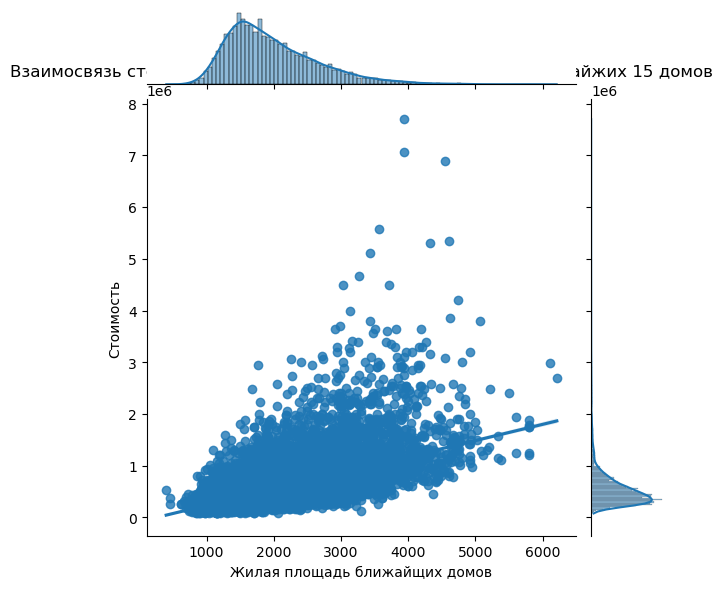

In [16]:
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg');
plt.title('Взаимосвязь стоимость недвижимости и жилой площади ближайжих 15 домов')
plt.xlabel('Жилая площадь ближайщих домов')
plt.ylabel('Стоимость');

На данном графие можно увидеть влияние жилой площади ближайших 15 домов на цену. 
Из графика можно сделать вывод: стоимость домов имеют прямую линейную зависимость от значения жилой площади ближайших 15 домов.

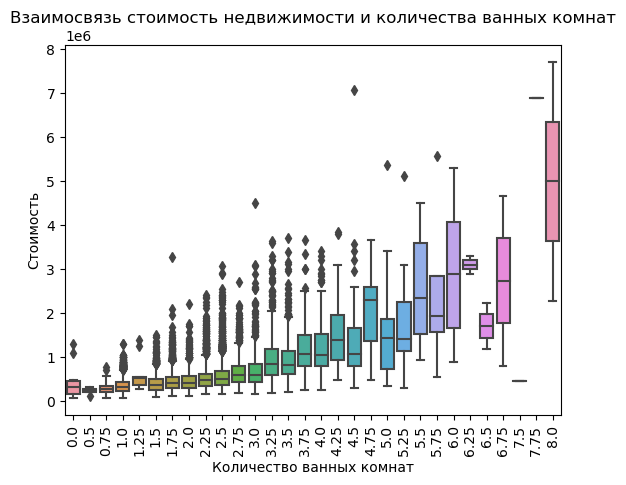

In [19]:
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.title('Взаимосвязь стоимость недвижимости и количества ванных комнат')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Стоимость')
plt.xticks(rotation=90);

С увелечением количества ванных комнат в целом наблюдается рост стоимости, но в тоже время наблюдается хаотичность на интервале, где количество варьируется от 4,25 до 7,75 и стремительный рост цены домов с 8 ванными комнатами.